Processing file: degree/G-2022-09-18.csv


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font fami

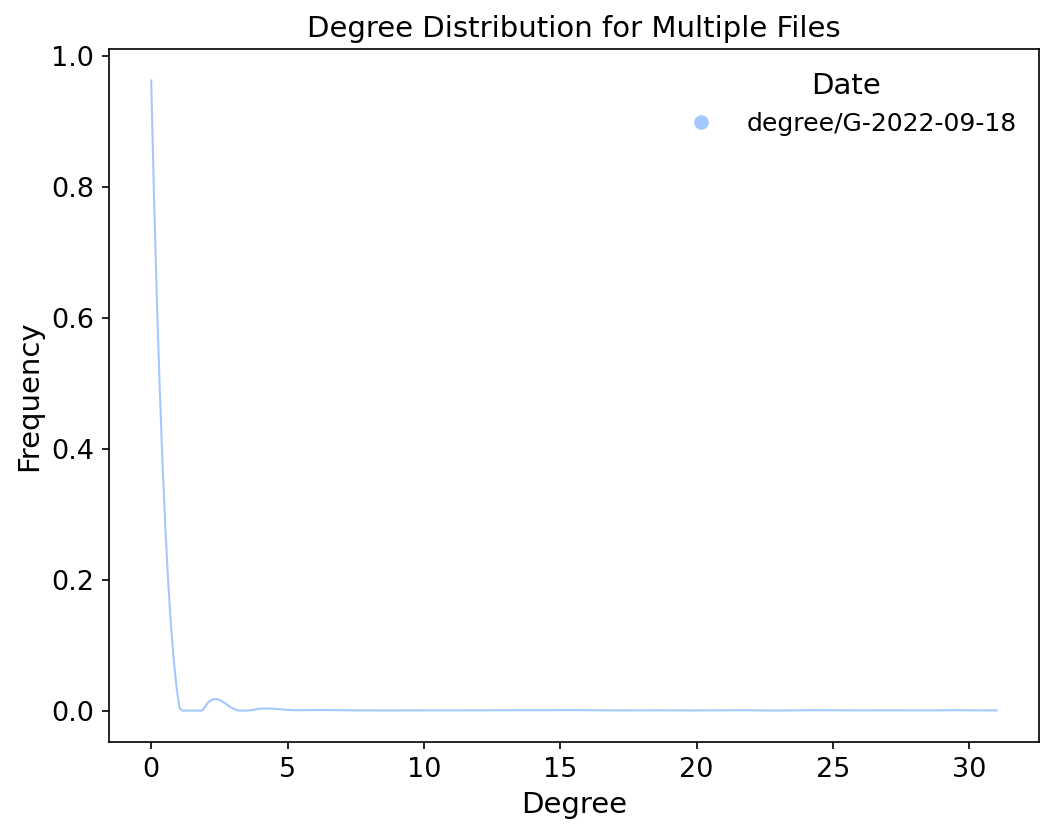

Degree distribution plots for all files saved on one graph with smooth curves and improved legend.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import pandas as pd
from scipy.interpolate import make_interp_spline
from matplotlib.lines import Line2D  # 导入Line2D用于创建图例的圆形标记

# 获取当前目录下所有的 G-YYYY-MM-DD 格式的文件
#files = [f for f in os.listdir() if f.startswith('G-') and f.endswith('.csv')]
files = ['degree/G-2022-09-18.csv']
# 创建一个存储度分布图的目录
output_dir = 'degree'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


def plot_degree_distribution(G, file_name, color, line_width=1):
    # 获取度分布数据
    degree_histogram = nx.degree_histogram(G)
    x = range(len(degree_histogram))  # 度值
    y = [z / float(sum(degree_histogram)) for z in degree_histogram]  # 频率

    # 使用样条插值平滑度分布曲线
    x_smooth = np.linspace(min(x), max(x), 300)  # 生成更细的x坐标
    spline = make_interp_spline(x, y, k=3)  # 立方样条插值
    y_smooth = spline(x_smooth)  # 获取平滑后的y坐标

    # 排除负概率值，确保所有概率值大于等于 0
    y_smooth = np.maximum(y_smooth, 0)  # 将负值替换为 0

    # 在同一张图上绘制多个文件的度分布（度值-概率）
    plt.plot(x_smooth, y_smooth, label=file_name, color=color, linewidth=line_width)


# 定义柔和协调的颜色
colors = ['#A3C8FF', '#1E3A8A', '#34D399', '#C084FC']  # 淡蓝、深蓝、绿色、淡紫
# 如果文件数量超过4个，我们将重复使用这些颜色
if len(files) > len(colors):
    colors = colors * (len(files) // len(colors)) + colors[:len(files) % len(colors)]

# 创建一个图表，绘制所有文件的度分布
plt.figure(figsize=(8, 6), dpi=150)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel("Degree", size=14)
plt.ylabel("Frequency", size=14)
plt.xticks(fontproperties='Times New Roman', size=13)
plt.yticks(fontproperties='Times New Roman', size=13)

# 对每个文件进行处理
for idx, file in enumerate(files):
    print(f"Processing file: {file}")

    # 使用 pandas 读取 CSV 数据，处理为邻接矩阵
    df = pd.read_csv(file, header=None, encoding='utf-8')

    # 确保所有数据都转化为数值类型（无法转换的部分会变为 NaN）
    df = df.apply(pd.to_numeric, errors='coerce')

    # 删除节点名为空的行和列（即所有元素都是 NaN 的行和列）
    df = df.dropna(axis=0, how='all')  # 删除全为空的行
    df = df.dropna(axis=1, how='all')  # 删除全为空的列

    # 转换为无向图的邻接矩阵（假设矩阵中值大于 0 且小于等于 1 表示边的权重）
    adj_matrix = df.values
    adj_matrix = np.where((adj_matrix > 0) & (adj_matrix <= 1), 1, 0)  # 1 表示边，0 表示没有边

    # 构建无向图
    G = nx.from_numpy_array(adj_matrix)

    # 调用绘图函数，将不同文件的度分布绘制在同一张图上
    color = colors[idx % len(colors)]  # 根据文件索引选择颜色
    plot_degree_distribution(G, file.split('.')[0], color)

# 添加图例（优化）使用小圆圈
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=file.split('.')[0]) for
    idx, (file, color) in enumerate(zip(files, colors))]

plt.legend(
    handles=legend_elements,  # 使用自定义的图例元素
    loc='upper right',  # 图例位置
    bbox_to_anchor=(1.0, 1),  # 确保图例不会遮挡图形
    frameon=False,  # 不显示图例背景框
    fontsize=12,  # 图例字体大小
    title="Date",  # 图例标题
    title_fontsize=14  # 图例标题字体大小
)

# 添加标题
plt.title('Degree Distribution for Multiple Files', fontsize=14)

# 去掉背景网格线
plt.grid(False)

# 保存图像
#plt.savefig(f'{output_dir}/all_files_degree_distribution_smooth_with_legend.png',
#            bbox_inches='tight')  # 使用 tight 确保保存时图形完整
plt.show()
plt.close()

print("Degree distribution plots for all files saved on one graph with smooth curves and improved legend.")

In [8]:
import os
os.getcwd()

'/home/root_gdut/KDD2025/old/折线图/1'

Processing file: G-2021-12-31.csv
Processing file: G-2021-12-08.csv
Processing file: G-2022-01-04.csv


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

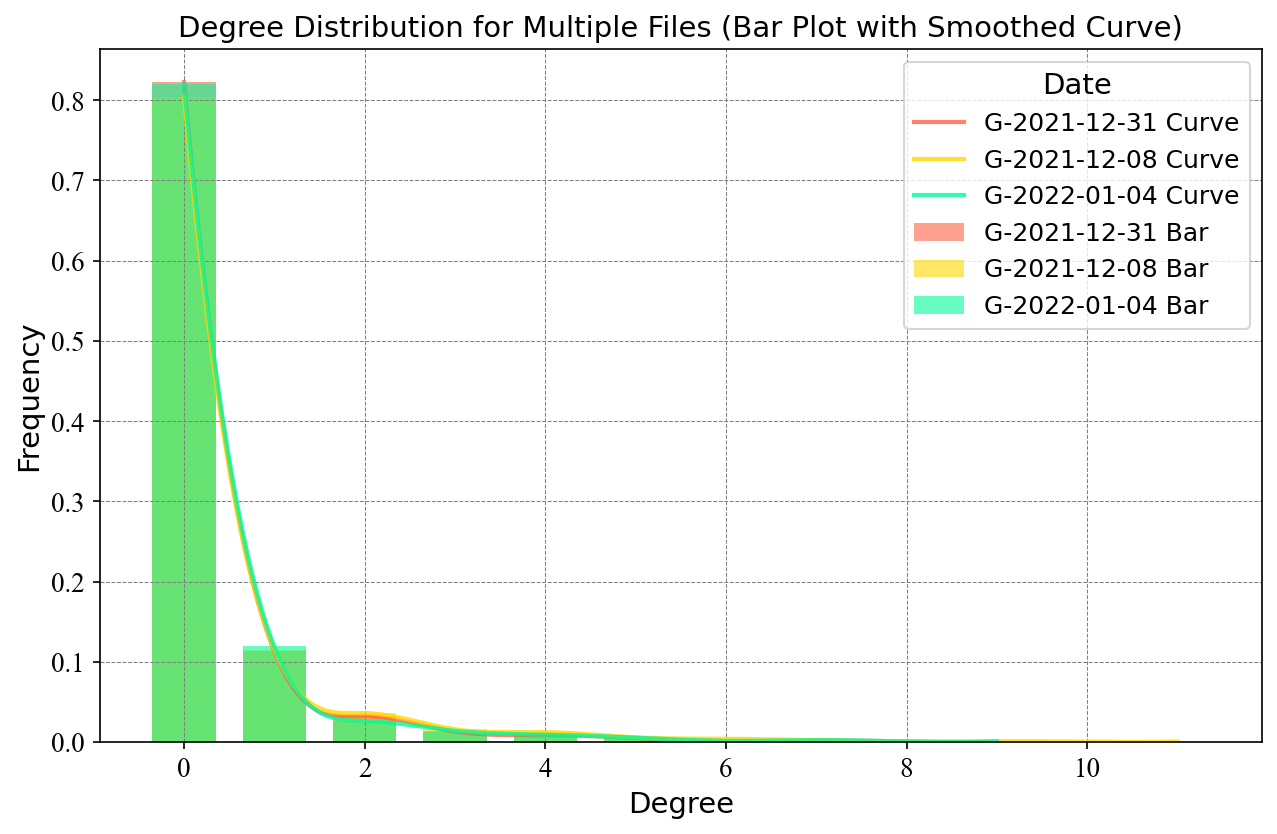

Degree distribution plots for all files saved on one graph as bar plot with curves.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import pandas as pd
from scipy.interpolate import make_interp_spline
os.chdir(r'/home/root_gdut/KDD2025/old/折线图/1/yin')
# 获取当前目录下所有的 G-YYYY-MM-DD 格式的文件
files = [f for f in os.listdir() if f.startswith('G-') and f.endswith('.csv')]
# 创建一个存储度分布图的目录
output_dir = 'degree'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def plot_degree_distribution(G, file_name, color):
    # 获取度分布数据
    degree_histogram = nx.degree_histogram(G)
    x = range(len(degree_histogram))  # 度值
    y = [z / float(sum(degree_histogram)) for z in degree_histogram]  # 频率

    # 使用样条插值平滑度分布曲线
    x_smooth = np.linspace(min(x), max(x), 300)  # 生成更细的x坐标
    spline = make_interp_spline(x, y, k=3)  # 立方样条插值
    y_smooth = spline(x_smooth)  # 获取平滑后的y坐标

    # 绘制柱状图
    plt.bar(x, y, width=0.7, label=f"{file_name} Bar", color=color, alpha=0.6)

    # 绘制平滑曲线
    plt.plot(x_smooth, y_smooth, label=f"{file_name} Curve", color=color, linewidth=2, alpha=0.8)

# 定义鲜艳的颜色
colors = ['#FF6347', '#FFD700', '#00FA9A', '#1E90FF']  # 番茄红、金色、中绿、道奇蓝

# 创建一个图表，绘制所有文件的度分布
plt.figure(figsize=(10, 6), dpi=150)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel("Degree", size=14)
plt.ylabel("Frequency", size=14)
plt.xticks(fontproperties='Times New Roman', size=13)
plt.yticks(fontproperties='Times New Roman', size=13)

# 对每个文件进行处理
for idx, file in enumerate(files):
    print(f"Processing file: {file}")

    # 使用 pandas 读取 CSV 数据，处理为邻接矩阵
    df = pd.read_csv(file, header=None, encoding='utf-8')

    # 确保所有数据都转化为数值类型（无法转换的部分会变为 NaN）
    df = df.apply(pd.to_numeric, errors='coerce')

    # 删除节点名为空的行和列（即所有元素都是 NaN 的行和列）
    df = df.dropna(axis=0, how='all')  # 删除全为空的行
    df = df.dropna(axis=1, how='all')  # 删除全为空的列

    # 转换为无向图的邻接矩阵（假设矩阵中值大于 0 且小于等于 1 表示边的权重）
    adj_matrix = df.values
    adj_matrix = np.where((adj_matrix > 0) & (adj_matrix <= 1), 1, 0)  # 1 表示边，0 表示没有边

    # 构建无向图
    G = nx.from_numpy_array(adj_matrix)

    # 调用绘图函数，将不同文件的度分布绘制在同一张图上
    color = colors[idx % len(colors)]  # 根据文件索引选择颜色
    plot_degree_distribution(G, file.split('/')[-1].split('.')[0], color)

# 添加图例
plt.legend(loc='upper right', fontsize=12, title="Date", title_fontsize=14)

# 添加标题
plt.title('Degree Distribution for Multiple Files (Bar Plot with Smoothed Curve)', fontsize=14)

# 显示网格线
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')


# 保存图像
plt.savefig(f'/home/root_gdut/KDD2025/old/折线图/1/yin/{output_dir}/all_files_degree_distribution_with_curve1.png', bbox_inches='tight')  # 使用 tight 确保保存时图形完整
plt.show()
print("Degree distribution plots for all files saved on one graph as bar plot with curves.")

Processing file: G-2021-12-31.csv
Processing file: G-2021-12-08.csv
Processing file: G-2022-01-04.csv


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

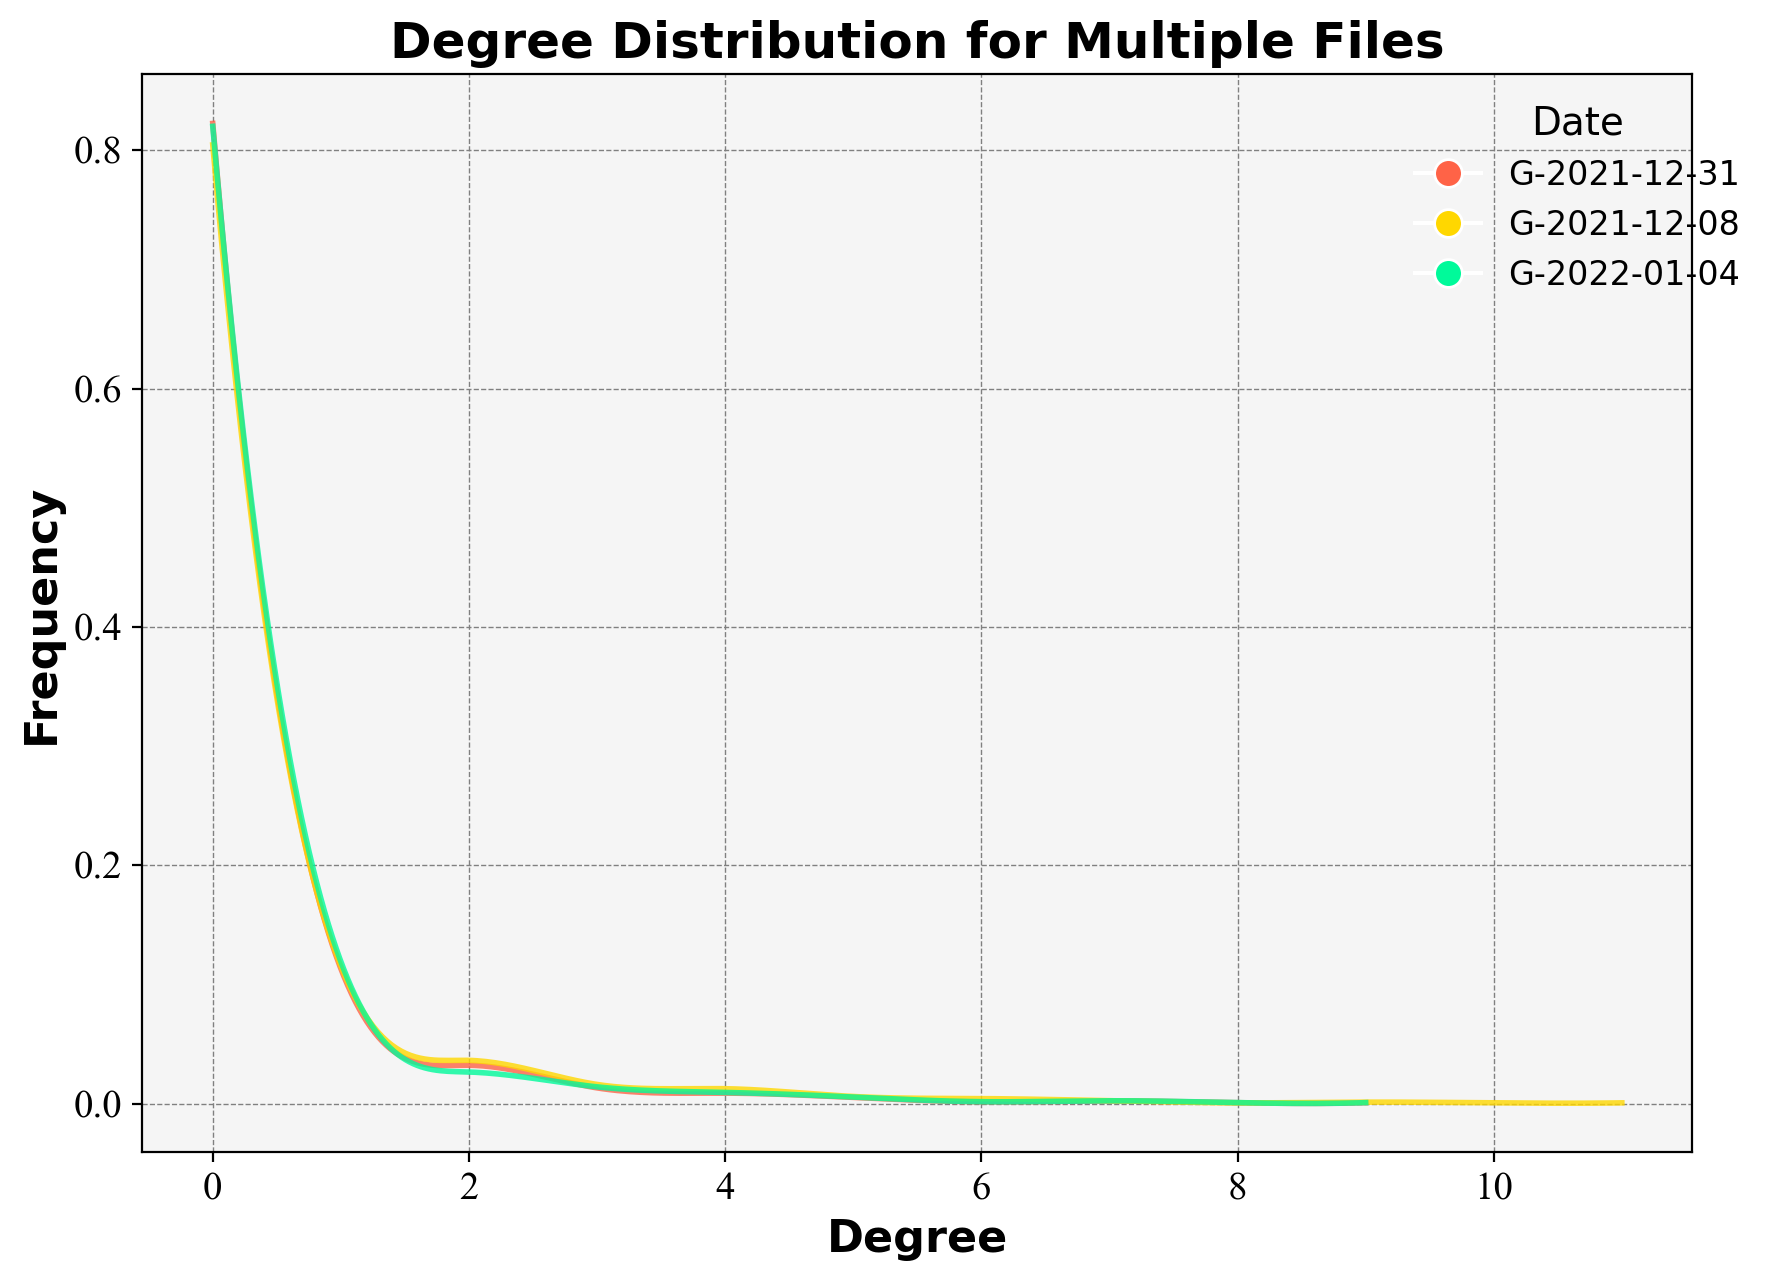

Degree distribution plots for all files saved on one graph with smooth curves and improved legend.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import pandas as pd
from scipy.interpolate import make_interp_spline
from matplotlib.lines import Line2D  # 导入Line2D用于创建图例的圆形标记
os.chdir(r'/home/root_gdut/KDD2025/old/折线图/1/yin')
# 获取当前目录下所有的 G-YYYY-MM-DD 格式的文件
files = [f for f in os.listdir() if f.startswith('G-') and f.endswith('.csv')]
# 创建一个存储度分布图的目录
output_dir = 'degree'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def plot_degree_distribution(G, file_name, color, line_width=2, alpha=0.8):
    # 获取度分布数据
    degree_histogram = nx.degree_histogram(G)
    x = range(len(degree_histogram))  # 度值
    y = [z / float(sum(degree_histogram)) for z in degree_histogram]  # 频率

    # 使用样条插值平滑度分布曲线
    x_smooth = np.linspace(min(x), max(x), 300)  # 生成更细的x坐标
    spline = make_interp_spline(x, y, k=3)  # 立方样条插值
    y_smooth = spline(x_smooth)  # 获取平滑后的y坐标

    # 排除负概率值，确保所有概率值大于等于 0
    y_smooth = np.maximum(y_smooth, 0)  # 将负值替换为 0

    # 在同一张图上绘制多个文件的度分布（度值-概率）
    plt.plot(x_smooth, y_smooth, label=file_name, color=color, linewidth=line_width, alpha=alpha)

# 定义鲜艳且协调的颜色
colors = ['#FF6347', '#FFD700', '#00FA9A', '#1E90FF']  # 番茄红、金色、中绿、道奇蓝
# 如果文件数量超过4个，我们将重复使用这些颜色
if len(files) > len(colors):
    colors = colors * (len(files) // len(colors)) + colors[:len(files) % len(colors)]

# 创建一个图表，绘制所有文件的度分布
plt.figure(figsize=(10, 7), dpi=200)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel("Degree", size=16, weight='bold')
plt.ylabel("Frequency", size=16, weight='bold')
plt.xticks(fontproperties='Times New Roman', size=14)
plt.yticks(fontproperties='Times New Roman', size=14)

# 对每个文件进行处理
for idx, file in enumerate(files):
    print(f"Processing file: {file}")

    # 使用 pandas 读取 CSV 数据，处理为邻接矩阵
    df = pd.read_csv(file, header=None, encoding='utf-8')

    # 确保所有数据都转化为数值类型（无法转换的部分会变为 NaN）
    df = df.apply(pd.to_numeric, errors='coerce')

    # 删除节点名为空的行和列（即所有元素都是 NaN 的行和列）
    df = df.dropna(axis=0, how='all')  # 删除全为空的行
    df = df.dropna(axis=1, how='all')  # 删除全为空的列

    # 转换为无向图的邻接矩阵（假设矩阵中值大于 0 且小于等于 1 表示边的权重）
    adj_matrix = df.values
    adj_matrix = np.where((adj_matrix > 0) & (adj_matrix <= 1), 1, 0)  # 1 表示边，0 表示没有边

    # 构建无向图
    G = nx.from_numpy_array(adj_matrix)

    # 调用绘图函数，将不同文件的度分布绘制在同一张图上
    color = colors[idx % len(colors)]  # 根据文件索引选择颜色
    plot_degree_distribution(G, file.split('/')[-1].split('.')[0], color)

# 添加图例（优化）使用小圆圈
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=file.split('/')[-1].split('.')[0])
    for idx, (file, color) in enumerate(zip(files, colors))
]

plt.legend(
    handles=legend_elements,  # 使用自定义的图例元素
    loc='upper right',  # 图例位置
    bbox_to_anchor=(1.05, 1),  # 确保图例不会遮挡图形
    frameon=False,  # 不显示图例背景框
    fontsize=12,  # 图例字体大小
    title="Date",  # 图例标题
    title_fontsize=14  # 图例标题字体大小
)

# 添加标题
plt.title('Degree Distribution for Multiple Files', fontsize=18, weight='bold')

# 去掉背景网格线
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')


# 添加阴影效果
ax = plt.gca()
ax.set_facecolor('#f5f5f5')

# 保存图像
plt.savefig(f'/home/root_gdut/KDD2025/old/折线图/1/yin/{output_dir}/all_files_degree_distribution_smooth_with_legend1.png',
            bbox_inches='tight', transparent=True)  # 使用 tight 确保保存时图形完整
plt.show()
plt.close()

print("Degree distribution plots for all files saved on one graph with smooth curves and improved legend.")

Processing file: G-2021-12-31.csv
Processing file: G-2021-12-08.csv
Processing file: G-2022-01-04.csv


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

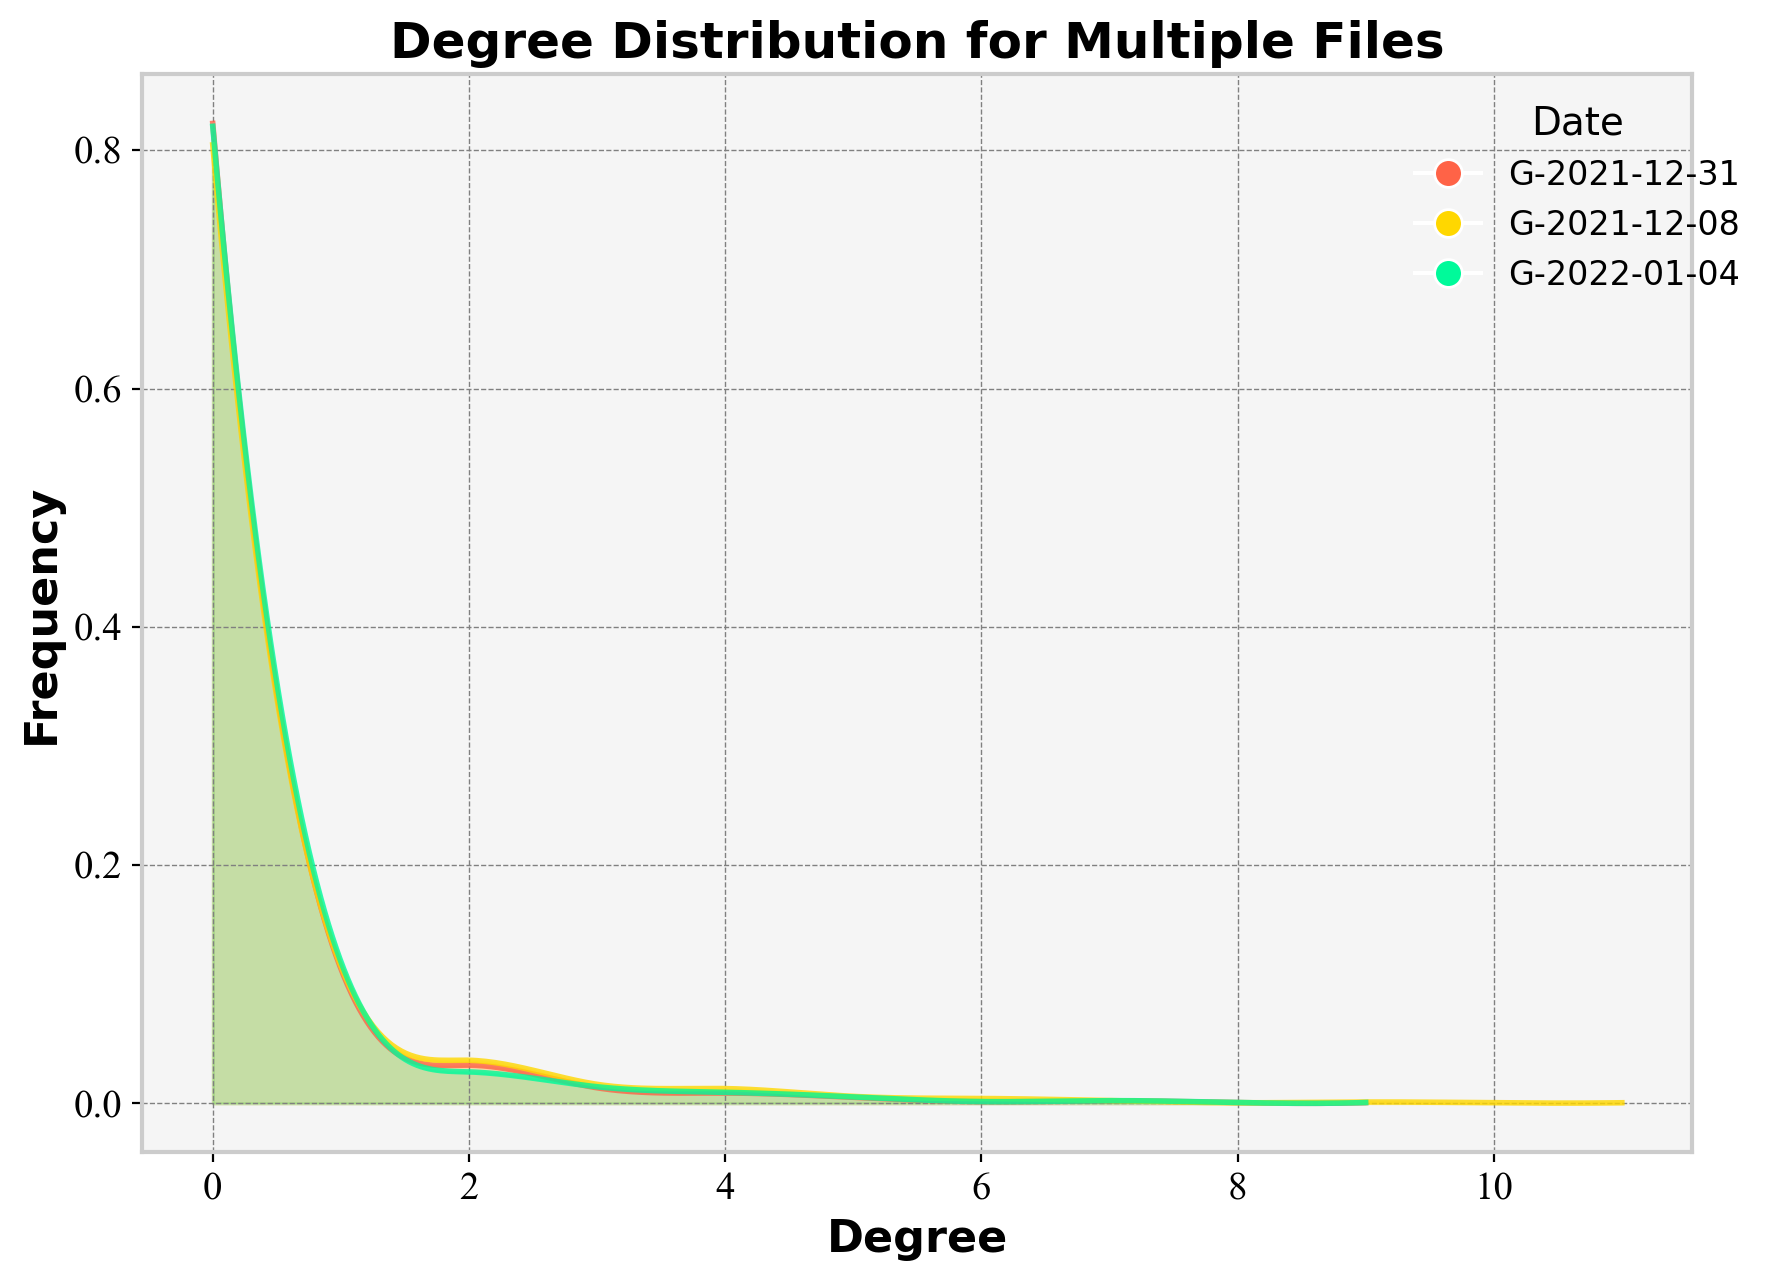

Degree distribution plots for all files saved on one graph with smooth curves and improved legend.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import pandas as pd
from scipy.interpolate import make_interp_spline
from matplotlib.lines import Line2D  # 导入Line2D用于创建图例的圆形标记

# 获取当前目录下所有的 G-YYYY-MM-DD 格式的文件
#files = ['/home/root_gdut/KDD2025/old/折线图/G-2022-05-29.csv']
files = [f for f in os.listdir() if f.startswith('G-') and f.endswith('.csv')]
# 创建一个存储度分布图的目录
output_dir = 'degree'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def plot_degree_distribution(G, file_name, color, line_width=2, alpha=0.8):
    # 获取度分布数据
    degree_histogram = nx.degree_histogram(G)
    x = range(len(degree_histogram))  # 度值
    y = [z / float(sum(degree_histogram)) for z in degree_histogram]  # 频率

    # 使用样条插值平滑度分布曲线
    x_smooth = np.linspace(min(x), max(x), 300)  # 生成更细的x坐标
    spline = make_interp_spline(x, y, k=3)  # 立方样条插值
    y_smooth = spline(x_smooth)  # 获取平滑后的y坐标

    # 排除负概率值，确保所有概率值大于等于 0
    y_smooth = np.maximum(y_smooth, 0)  # 将负值替换为 0

    # 在同一张图上绘制多个文件的度分布（度值-概率）
    plt.plot(x_smooth, y_smooth, label=file_name, color=color, linewidth=line_width, alpha=alpha)

    # 添加阴影效果
    plt.fill_between(x_smooth, y_smooth, color=color, alpha=0.2)

# 定义鲜艳且协调的颜色
colors = ['#FF6347', '#FFD700', '#00FA9A', '#1E90FF']  # 番茄红、金色、中绿、道奇蓝
# 如果文件数量超过4个，我们将重复使用这些颜色
if len(files) > len(colors):
    colors = colors * (len(files) // len(colors)) + colors[:len(files) % len(colors)]

# 创建一个图表，绘制所有文件的度分布
plt.figure(figsize=(10, 7), dpi=200)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel("Degree", size=16, weight='bold')
plt.ylabel("Frequency", size=16, weight='bold')
plt.xticks(fontproperties='Times New Roman', size=14)
plt.yticks(fontproperties='Times New Roman', size=14)

# 对每个文件进行处理
for idx, file in enumerate(files):
    print(f"Processing file: {file}")

    # 使用 pandas 读取 CSV 数据，处理为邻接矩阵
    df = pd.read_csv(file, header=None, encoding='utf-8')

    # 确保所有数据都转化为数值类型（无法转换的部分会变为 NaN）
    df = df.apply(pd.to_numeric, errors='coerce')

    # 删除节点名为空的行和列（即所有元素都是 NaN 的行和列）
    df = df.dropna(axis=0, how='all')  # 删除全为空的行
    df = df.dropna(axis=1, how='all')  # 删除全为空的列

    # 转换为无向图的邻接矩阵（假设矩阵中值大于 0 且小于等于 1 表示边的权重）
    adj_matrix = df.values
    adj_matrix = np.where((adj_matrix > 0) & (adj_matrix <= 1), 1, 0)  # 1 表示边，0 表示没有边

    # 构建无向图
    G = nx.from_numpy_array(adj_matrix)

    # 调用绘图函数，将不同文件的度分布绘制在同一张图上
    color = colors[idx % len(colors)]  # 根据文件索引选择颜色
    plot_degree_distribution(G, file.split('/')[-1].split('.')[0], color)

# 添加图例（优化）使用小圆圈
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=file.split('/')[-1].split('.')[0])
    for idx, (file, color) in enumerate(zip(files, colors))
]

plt.legend(
    handles=legend_elements,  # 使用自定义的图例元素
    loc='upper right',  # 图例位置
    bbox_to_anchor=(1.05, 1),  # 确保图例不会遮挡图形
    frameon=False,  # 不显示图例背景框
    fontsize=12,  # 图例字体大小
    title="Date",  # 图例标题
    title_fontsize=14  # 图例标题字体大小
)

# 添加标题
plt.title('Degree Distribution for Multiple Files', fontsize=18, weight='bold')

# 去掉背景网格线
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# 添加阴影效果
ax = plt.gca()
ax.set_facecolor('#f5f5f5')

# 添加三维效果
for spine in ax.spines.values():
    spine.set_edgecolor('#CCCCCC')
    spine.set_linewidth(1.5)

# 保存图像
plt.savefig(f'/home/root_gdut/KDD2025/old/折线图/1/xian/{output_dir}/all_files_degree_distribution_smooth_with_legend1.png',
            bbox_inches='tight', transparent=True)  # 使用 tight 确保保存时图形完整
plt.show()
plt.close()

print("Degree distribution plots for all files saved on one graph with smooth curves and improved legend.")

Processing file: G-2022-09-18.csv
Processing file: G-2022-06-12.csv
Processing file: G-2022-04-10.csv


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font 

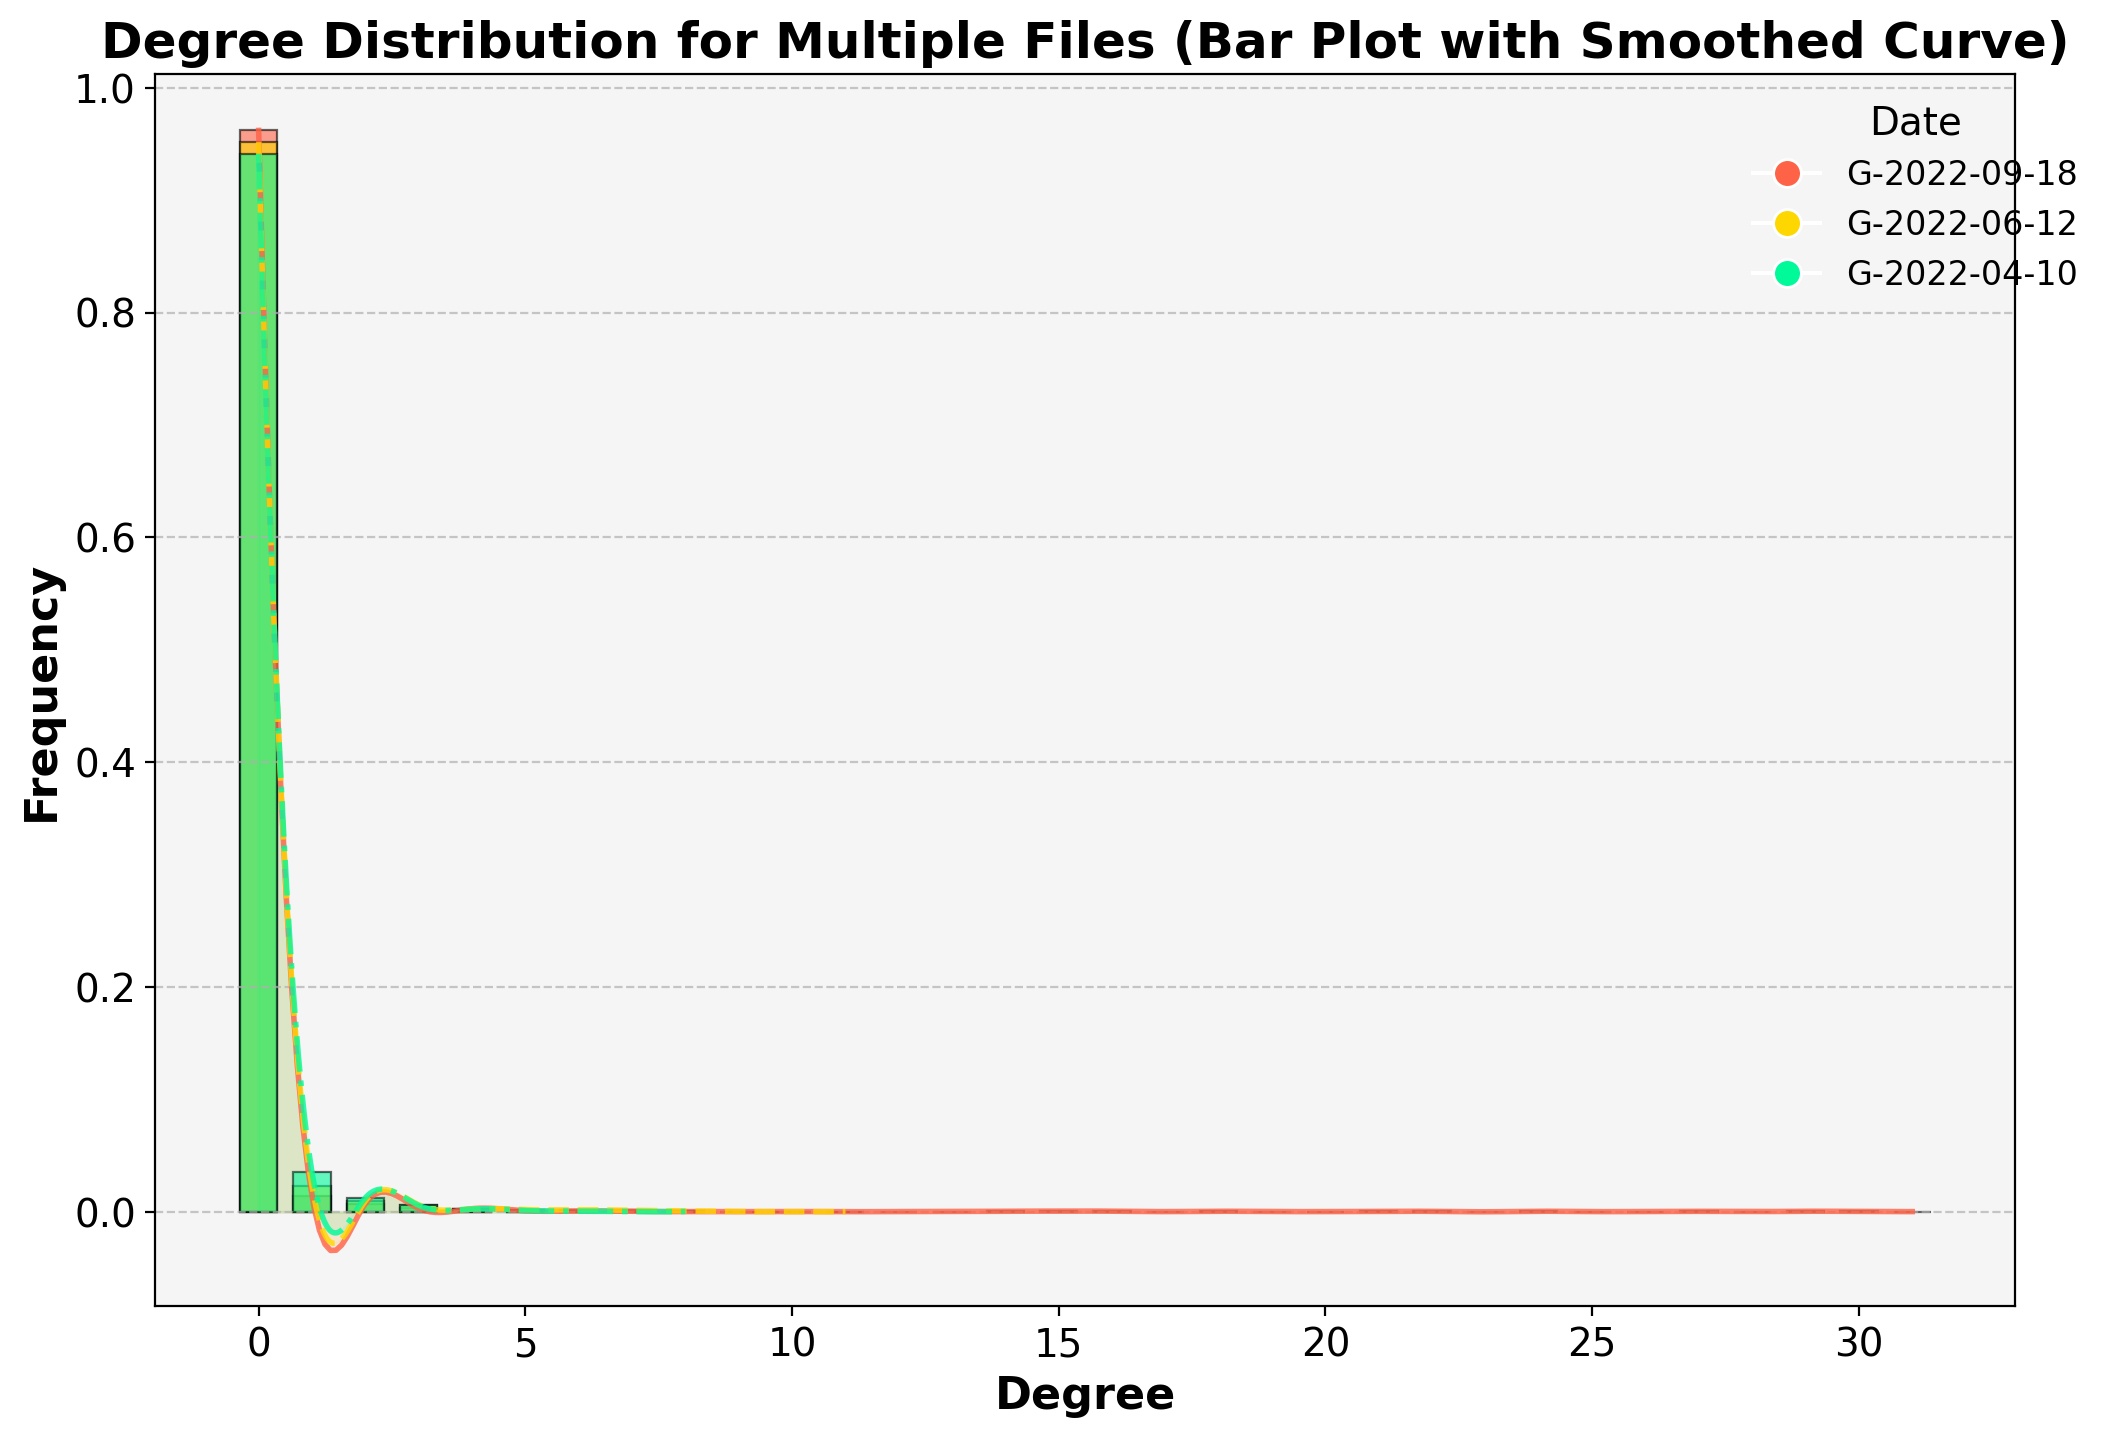

Degree distribution plots for all files saved on one graph as bar plot with smoothed curves.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import pandas as pd
from scipy.interpolate import make_interp_spline
from matplotlib.lines import Line2D

# 切换到指定目录
os.chdir(r'/home/root_gdut/KDD2025/old/折线图/2/yin')

# 获取当前目录下所有的 G-YYYY-MM-DD 格式的文件
files = [f for f in os.listdir() if f.startswith('G-') and f.endswith('.csv')]

# 创建一个存储度分布图的目录
output_dir = 'degree'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def plot_degree_distribution(G, file_name, color, linestyle, alpha_fill=0.1):
    # 获取度分布数据
    degree_histogram = nx.degree_histogram(G)
    x = range(len(degree_histogram))  # 度值
    y = [z / float(sum(degree_histogram)) for z in degree_histogram]  # 频率

    # 使用样条插值平滑度分布曲线
    x_smooth = np.linspace(min(x), max(x), 300)  # 生成更细的x坐标
    spline = make_interp_spline(x, y, k=3)  # 立方样条插值
    y_smooth = spline(x_smooth)  # 获取平滑后的y坐标

    # 绘制柱状图并添加阴影效果
    plt.bar(x, y, width=0.7, label=f"{file_name} Bar", color=color, alpha=0.6, edgecolor='black', linewidth=0.8)

    # 绘制平滑曲线，并填充区域
    plt.plot(x_smooth, y_smooth, label=f"{file_name} Curve", color=color, linewidth=2, alpha=0.8, linestyle=linestyle)
    plt.fill_between(x_smooth, y_smooth, color=color, alpha=alpha_fill)

# 定义鲜艳且协调的颜色和线型
colors = ['#FF6347', '#FFD700', '#00FA9A', '#1E90FF']  # 番茄红、金色、中绿、道奇蓝
line_styles = ['-', '--', '-.', ':']  # 实线、虚线、点划线、点线

# 如果文件数量超过4个，我们将重复使用这些颜色和线型
if len(files) > len(colors):
    colors = colors * (len(files) // len(colors)) + colors[:len(files) % len(colors)]
    line_styles = line_styles * (len(files) // len(line_styles)) + line_styles[:len(files) % len(line_styles)]

# 创建一个图表，绘制所有文件的度分布
plt.figure(figsize=(12, 8), dpi=200)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel("Degree", size=16, weight='bold')
plt.ylabel("Frequency", size=16, weight='bold')
plt.xticks(fontproperties='Times New Roman', size=14)
plt.yticks(fontproperties='Times New Roman', size=14)

# 对每个文件进行处理
for idx, file in enumerate(files):
    print(f"Processing file: {file}")

    # 使用 pandas 读取 CSV 数据，处理为邻接矩阵
    df = pd.read_csv(file, header=None, encoding='utf-8')

    # 确保所有数据都转化为数值类型（无法转换的部分会变为 NaN）
    df = df.apply(pd.to_numeric, errors='coerce')

    # 删除节点名为空的行和列（即所有元素都是 NaN 的行和列）
    df = df.dropna(axis=0, how='all')  # 删除全为空的行
    df = df.dropna(axis=1, how='all')  # 删除全为空的列

    # 转换为无向图的邻接矩阵（假设矩阵中值大于 0 且小于等于 1 表示边的权重）
    adj_matrix = df.values
    adj_matrix = np.where((adj_matrix > 0) & (adj_matrix <= 1), 1, 0)  # 1 表示边，0 表示没有边

    # 构建无向图
    G = nx.from_numpy_array(adj_matrix)

    # 调用绘图函数，将不同文件的度分布绘制在同一张图上
    color = colors[idx % len(colors)]  # 根据文件索引选择颜色
    linestyle = line_styles[idx % len(line_styles)]  # 根据文件索引选择线型
    plot_degree_distribution(G, file.split('.')[0], color, linestyle)

# 添加图例（优化）使用小圆圈
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=file.split('.')[0])
    for idx, (file, color) in enumerate(zip(files, colors))
]

plt.legend(
    handles=legend_elements,  # 使用自定义的图例元素
    loc='upper right',  # 图例位置
    bbox_to_anchor=(1.05, 1),  # 确保图例不会遮挡图形
    frameon=False,  # 不显示图例背景框
    fontsize=12,  # 图例字体大小
    title="Date",  # 图例标题
    title_fontsize=14  # 图例标题字体大小
)

# 添加标题
plt.title('Degree Distribution for Multiple Files (Bar Plot with Smoothed Curve)', fontsize=18, weight='bold')

# 显示网格线
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)

# 添加阴影效果
ax = plt.gca()
ax.set_facecolor('#f5f5f5')

# 保存图像
plt.savefig(f'{output_dir}/all_files_degree_distribution_with_curve1.png', bbox_inches='tight', transparent=True)  # 使用 tight 确保保存时图形完整
plt.show()
plt.close()

print("Degree distribution plots for all files saved on one graph as bar plot with smoothed curves.")

Processing file: G-2021-12-31.csv
Processing file: G-2021-12-08.csv
Processing file: G-2022-01-04.csv


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

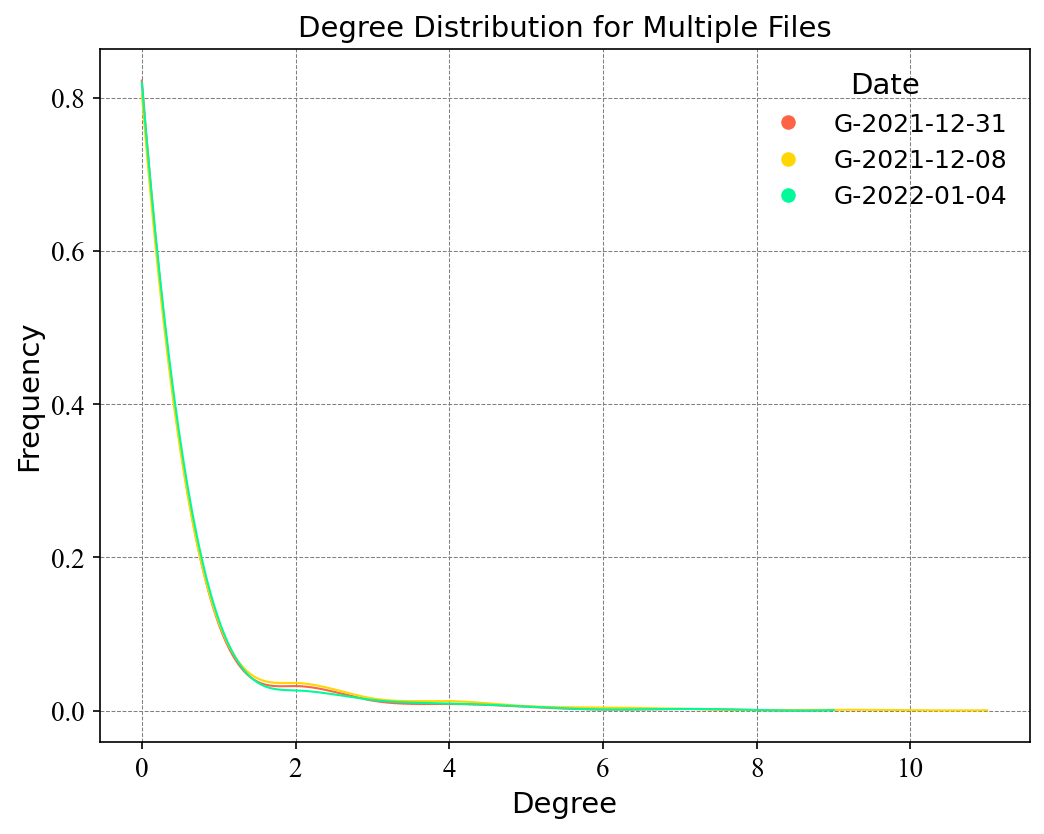

Degree distribution plots for all files saved on one graph with smooth curves and improved legend.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import pandas as pd
from scipy.interpolate import make_interp_spline
from matplotlib.lines import Line2D  # 导入Line2D用于创建图例的圆形标记
os.chdir(r'/home/root_gdut/KDD2025/old/折线图/1')
# 获取当前目录下所有的 G-YYYY-MM-DD 格式的文件
files = [f for f in os.listdir() if f.startswith('G-') and f.endswith('.csv')]
# 创建一个存储度分布图的目录
output_dir = 'degree'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


def plot_degree_distribution(G, file_name, color, line_width=1):
    # 获取度分布数据
    degree_histogram = nx.degree_histogram(G)
    x = range(len(degree_histogram))  # 度值
    y = [z / float(sum(degree_histogram)) for z in degree_histogram]  # 频率

    # 使用样条插值平滑度分布曲线
    x_smooth = np.linspace(min(x), max(x), 300)  # 生成更细的x坐标
    spline = make_interp_spline(x, y, k=3)  # 立方样条插值
    y_smooth = spline(x_smooth)  # 获取平滑后的y坐标

    # 排除负概率值，确保所有概率值大于等于 0
    y_smooth = np.maximum(y_smooth, 0)  # 将负值替换为 0

    # 在同一张图上绘制多个文件的度分布（度值-概率）
    plt.plot(x_smooth, y_smooth, label=file_name, color=color, linewidth=line_width)


# 定义柔和协调的颜色
colors = ['#FF6347', '#FFD700', '#00FA9A', '#1E90FF']  # 番茄红、金色、中绿、道奇蓝
# 如果文件数量超过4个，我们将重复使用这些颜色
if len(files) > len(colors):
    colors = colors * (len(files) // len(colors)) + colors[:len(files) % len(colors)]

# 创建一个图表，绘制所有文件的度分布
plt.figure(figsize=(8, 6), dpi=150)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel("Degree", size=14)
plt.ylabel("Frequency", size=14)
plt.xticks(fontproperties='Times New Roman', size=13)
plt.yticks(fontproperties='Times New Roman', size=13)

# 对每个文件进行处理
for idx, file in enumerate(files):
    print(f"Processing file: {file}")

    # 使用 pandas 读取 CSV 数据，处理为邻接矩阵
    df = pd.read_csv(file, header=None, encoding='utf-8')

    # 确保所有数据都转化为数值类型（无法转换的部分会变为 NaN）
    df = df.apply(pd.to_numeric, errors='coerce')

    # 删除节点名为空的行和列（即所有元素都是 NaN 的行和列）
    df = df.dropna(axis=0, how='all')  # 删除全为空的行
    df = df.dropna(axis=1, how='all')  # 删除全为空的列

    # 转换为无向图的邻接矩阵（假设矩阵中值大于 0 且小于等于 1 表示边的权重）
    adj_matrix = df.values
    adj_matrix = np.where((adj_matrix > 0) & (adj_matrix <= 1), 1, 0)  # 1 表示边，0 表示没有边

    # 构建无向图
    G = nx.from_numpy_array(adj_matrix)

    # 调用绘图函数，将不同文件的度分布绘制在同一张图上
    color = colors[idx % len(colors)]  # 根据文件索引选择颜色
    plot_degree_distribution(G, file.split('.')[0], color)

# 添加图例（优化）使用小圆圈
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=file.split('.')[0]) for
    idx, (file, color) in enumerate(zip(files, colors))]

plt.legend(
    handles=legend_elements,  # 使用自定义的图例元素
    loc='upper right',  # 图例位置
    bbox_to_anchor=(1.0, 1),  # 确保图例不会遮挡图形
    frameon=False,  # 不显示图例背景框
    fontsize=12,  # 图例字体大小
    title="Date",  # 图例标题
    title_fontsize=14  # 图例标题字体大小
)

# 添加标题
plt.title('Degree Distribution for Multiple Files', fontsize=14)

# 去掉背景网格线
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# 保存图像
plt.savefig(f'{output_dir}/all_files_degree_distribution_smooth_with_legend1.png',
            bbox_inches='tight')  # 使用 tight 确保保存时图形完整
plt.show()
plt.close()
print("Degree distribution plots for all files saved on one graph with smooth curves and improved legend.")

Processing file: G-2021-08-08.csv
Processing file: G-2022-03-06.csv


/tmp/ipykernel_2233626/2811037639.py:47: DtypeWarning: Columns (22,27,50,52,61,67,99,105,110,146,167,171,173,185,186,192,196,200,215,219,228,239,247,250,259,263,268,269,271,272,284,286,291,294,296,300,304,309,339,341,344,346,347,348,351,359,361,362,366,370,375,378,383,384,393,399,400,416,433,452,459,462,468,469,471,480,496,499,502,503,505,507,515,521,522,525,527,531,532,538,547,552,555,568,569,574,578,583,593,595,601,602,604,607,608,621,625,631,633,634,642,657,660,668,678,679,687,694,701,710,713,715,719,722,723,738,739,740,743,746,748,751,752,768,770,772,773,776,781,784,787,792,802,809,810,812,815,822,825,831,832,837,839,849,858,864,866,868,876,880,882,890,891,899,903,909,914,917,932,937,944,947,949,951,954,957,960,965,967,969,974,979,982,985,986,987,992,998,999,1000,1002,1010,1011,1016,1019,1020,1021,1022,1023,1027,1028,1031,1032,1033,1034,1036,1039,1043,1047,1049,1053,1054,1058,1067,1071,1080,1083,1086,1088,1090,1093,1094,1096,1100,1106,1108,1109,1111,1113,1118,1123,1126,1131,1134,11

Processing file: G-2022-05-29.csv


/tmp/ipykernel_2233626/2811037639.py:47: DtypeWarning: Columns (22,27,50,52,61,67,99,105,110,146,167,171,173,185,186,192,196,200,215,219,228,239,247,250,259,263,268,269,271,272,284,286,291,294,296,300,304,309,339,341,344,346,347,348,351,359,361,362,366,370,375,378,383,384,393,399,400,416,433,452,459,462,468,469,471,480,496,499,502,503,505,507,515,521,522,525,527,531,532,538,547,552,555,568,569,574,578,583,593,595,601,602,604,607,608,621,625,631,633,634,642,657,660,668,678,679,687,694,701,710,713,715,719,722,723,738,739,740,743,746,748,751,752,768,770,772,773,776,781,784,787,792,802,809,810,812,815,822,825,831,832,837,839,849,858,864,866,868,876,880,882,890,891,899,903,909,914,917,932,937,944,947,949,951,954,957,960,965,967,969,974,979,982,985,986,987,992,998,999,1000,1002,1010,1011,1016,1019,1020,1021,1022,1023,1027,1028,1031,1032,1033,1034,1036,1039,1043,1047,1049,1053,1054,1058,1067,1071,1080,1083,1086,1088,1090,1093,1094,1096,1100,1106,1108,1109,1111,1113,1118,1123,1126,1131,1134,11

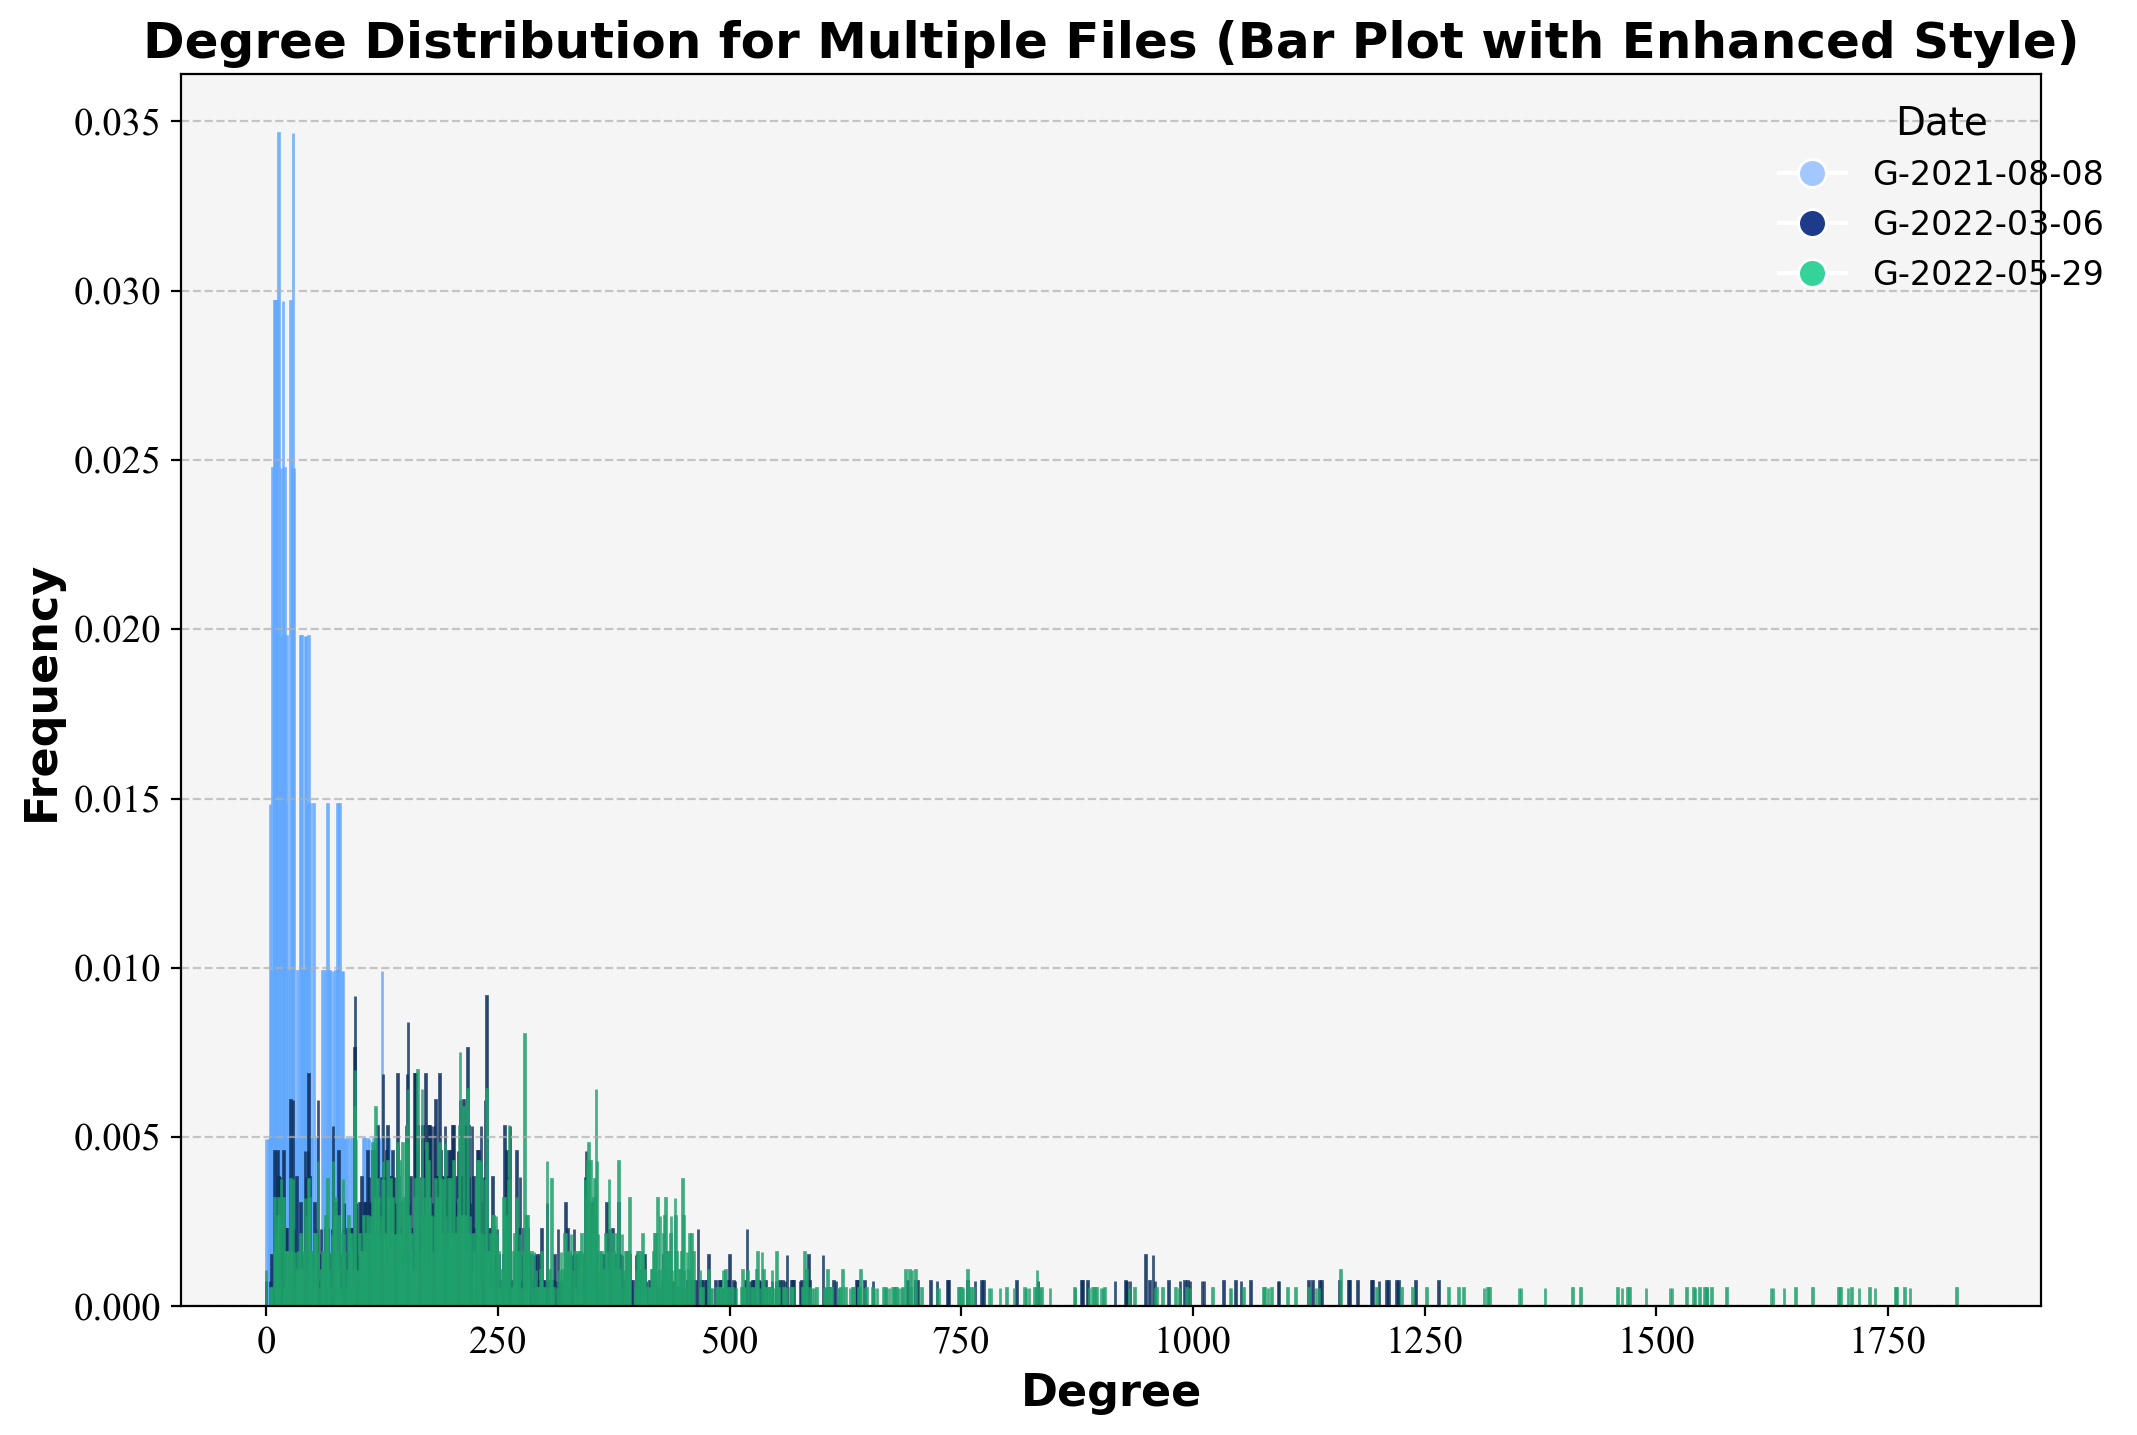

Degree distribution plots for all files saved on one graph with enhanced style.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import pandas as pd
from matplotlib.lines import Line2D
os.chdir(r'/home/root_gdut/KDD2025/old/折线图/2/xian')
# 获取当前目录下所有的 G-YYYY-MM-DD 格式的文件
files = [f for f in os.listdir() if f.startswith('G-') and f.endswith('.csv')]

# 创建一个存储度分布图的目录
output_dir = 'degree'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def plot_degree_distribution(G, file_name, color, edge_color, width=0.7, alpha_bar=0.8):
    # 获取度分布数据
    degree_histogram = nx.degree_histogram(G)
    x = range(len(degree_histogram))  # 度值
    y = [z / float(sum(degree_histogram)) for z in degree_histogram]  # 频率

    # 绘制柱状图并添加边框颜色
    plt.bar(x, y, width=width, label=file_name, color=color, edgecolor=edge_color, alpha=alpha_bar)

# 定义柔和协调的颜色和边框颜色
colors = ['#A3C8FF', '#1E3A8A', '#34D399', '#C084FC']  # 淡蓝、深蓝、绿色、淡紫
edge_colors = ['#60A7FF', '#0B2E5A', '#1F9E6A', '#8B5FBF']  # 更深的颜色用于边框

# 如果文件数量超过4个，我们将重复使用这些颜色
if len(files) > len(colors):
    colors = colors * (len(files) // len(colors)) + colors[:len(files) % len(colors)]
    edge_colors = edge_colors * (len(files) // len(edge_colors)) + edge_colors[:len(files) % len(edge_colors)]

# 创建一个图表，绘制所有文件的度分布
plt.figure(figsize=(12, 8), dpi=200)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel("Degree", size=16, weight='bold')
plt.ylabel("Frequency", size=16, weight='bold')
plt.xticks(fontproperties='Times New Roman', size=14)
plt.yticks(fontproperties='Times New Roman', size=14)

# 对每个文件进行处理
for idx, file in enumerate(files):
    print(f"Processing file: {file}")

    # 使用 pandas 读取 CSV 数据，处理为邻接矩阵
    df = pd.read_csv(file, header=None, encoding='utf-8')

    # 确保所有数据都转化为数值类型（无法转换的部分会变为 NaN）
    df = df.apply(pd.to_numeric, errors='coerce')

    # 删除节点名为空的行和列（即所有元素都是 NaN 的行和列）
    df = df.dropna(axis=0, how='all')  # 删除全为空的行
    df = df.dropna(axis=1, how='all')  # 删除全为空的列

    # 转换为无向图的邻接矩阵（假设矩阵中值大于 0 且小于等于 1 表示边的权重）
    adj_matrix = df.values
    adj_matrix = np.where((adj_matrix > 0) & (adj_matrix <= 1), 1, 0)  # 1 表示边，0 表示没有边

    # 构建无向图
    G = nx.from_numpy_array(adj_matrix)

    # 调用绘图函数，将不同文件的度分布绘制在同一张图上
    color = colors[idx % len(colors)]  # 根据文件索引选择颜色
    edge_color = edge_colors[idx % len(edge_colors)]  # 根据文件索引选择边框颜色
    plot_degree_distribution(G, file.split('.')[0], color, edge_color)

# 添加图例（优化）使用小圆圈
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=file.split('.')[0])
    for idx, (file, color) in enumerate(zip(files, colors))
]

plt.legend(
    handles=legend_elements,  # 使用自定义的图例元素
    loc='upper right',  # 图例位置
    bbox_to_anchor=(1.05, 1),  # 确保图例不会遮挡图形
    frameon=False,  # 不显示图例背景框
    fontsize=12,  # 图例字体大小
    title="Date",  # 图例标题
    title_fontsize=14  # 图例标题字体大小
)

# 添加标题
plt.title('Degree Distribution for Multiple Files (Bar Plot with Enhanced Style)', fontsize=18, weight='bold')

# 显示网格线
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)

# 添加阴影效果
ax = plt.gca()
ax.set_facecolor('#f5f5f5')

# 保存图像
plt.savefig(f'{output_dir}/all_files_degree_distribution_with_enhanced_style1.png',
            bbox_inches='tight', transparent=True)  # 使用 tight 确保保存时图形完整
plt.show()
plt.close()

print("Degree distribution plots for all files saved on one graph with enhanced style.")

In [8]:
import htne  
import networkx as nx  
from datetime import datetime  

def build_htne_graph(edges_with_time):  
    """  
    将边列表转换为 HTNE 图对象  
    :param edges_with_time: [(u, v, timestamp)]  
    """  
    G = htne.Graph()  
    nodes = set()  
    for u, v, t in edges_with_time:  
        nodes.add(u)  
        nodes.add(v)  
        G.add_edge(u, v, int(t.timestamp()))  # HTNE 要求时间戳为整数  
    return G  

def run_htne_embedding(G, dim=128):  
    """  
    生成 HTNE 嵌入  
    """  
    model = htne.HTNE(G,  
                     dim=dim,  
                     walk_length=10,  
                     num_walks=20,  
                     workers=4)  
    embeddings = model.train()  
    return embeddings  

# 示例调用  
edges = [("userA", "userB", datetime(2023,5,1)),  
         ("userC", "userD", datetime(2023,5,2))]  
htne_graph = build_htne_graph(edges)  
embeddings = run_htne_embedding(htne_graph)  
print(embeddings["userA"][:5])  # 输出前5维嵌入

ModuleNotFoundError: No module named 'htne'

In [9]:
!pip install htne

ERROR: Could not find a version that satisfies the requirement htne (from versions: none)
ERROR: No matching distribution found for htne
